In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bootstrap

In [4]:
# Load the data from the uploaded CSV file
file_path = './Cm_coefficients.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,AoA,M0.6_Cm-ALPHA,M1.0_Cm-ALPHA,M1.5_Cm-ALPHA,M4.63_Cm-ALPHA,M2.3_Cm-ALPHA
0,-8.0,NaN,NaN,NaN,NaN,NaN
1,-7.9,NaN,NaN,NaN,NaN,NaN
2,-7.8,NaN,NaN,NaN,NaN,NaN
3,-7.7,NaN,NaN,NaN,NaN,NaN
4,-7.6,NaN,NaN,NaN,NaN,NaN


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


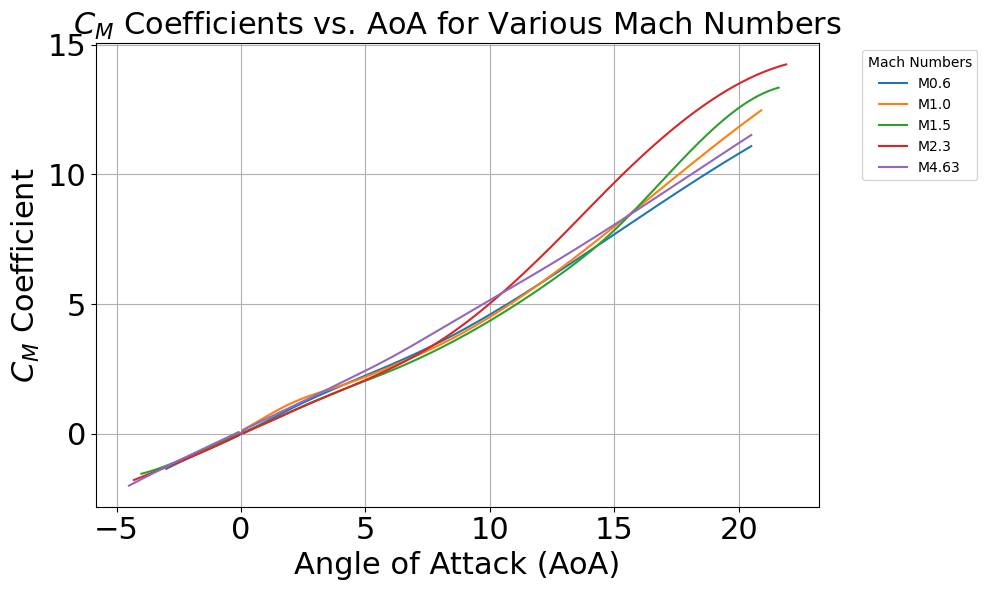

In [5]:
# Extract the Mach number from each column name and sort the columns by Mach number
# Create a list of tuples (mach_number, column_name), sort by mach_number
sorted_columns = sorted([(float(col.split('_')[0][1:]), col) for col in data.columns[1:]])

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through the sorted Mach number columns
for mach, column in sorted_columns:
    # Extract the AoA and corresponding CM values, removing NaNs
    aoa = data['AoA']
    cm_values = data[column]
    
    # Plot only if there are valid data points
    if cm_values.notna().any():
        plt.plot(aoa, cm_values, label=f"M{mach}")

# Add labels and title
plt.xlabel('Angle of Attack (AoA)', fontsize=22)
plt.ylabel('$C_M$ Coefficient', fontsize=22)
plt.title('$C_M$ Coefficients vs. AoA for Various Mach Numbers', fontsize=22)
plt.grid(True)
plt.legend(title='Mach Numbers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks

# Adjust layout for better viewing
plt.tight_layout()

plt.savefig("CM_vs_alpha.png")
plt.savefig("CM_vs_alpha.eps")
plt.savefig("CM_vs_alpha.pdf")

plt.show()

### $C_M$ coefficient for $\alpha$ = 0$^\circ$ as function of Mach number.

In [6]:
# ### OpenFOAM results ###
# ########################
# # Data for Mach numbers and corresponding CM values for AoA = 0
# OF_data = {
#     0.6: [-0.001, -0.002],  # Corresponds to R5 and R1
#     1.0: [0.004, 0.002],  # Corresponds to R5 and R1
#     1.5: [0.001, 0.001],  # Corresponds to R5 and R1
#     2.3: [0.000, 0.000],  # Corresponds to R5 and R1
#     4.63: [0.000, 0.000]  # Corresponds to R5 and R1
# }

# # Extracting Mach numbers and corresponding CM values
# OF_mach_numbers = list(OF_data.keys())
# CM_values_R5 = [values[0] for values in OF_data.values()]  # Select R5 values
# CM_values_R1 = [values[1] for values in OF_data.values()]  # Select R1 values

# ### Fluent results ###
# ######################
# # Data for Mach numbers and corresponding CM values for AoA = 0
# FLUENT_data = {
#     0.6: [0.000, 0.000],  # Corresponds to R5 and R1
#     1.0: [0.000, 0.000],  # Corresponds to R5 and R1
#     1.5: [0.000, 0.000],  # Corresponds to R5 and R1
#     2.3: [0.000, 0.000],  # Corresponds to R5 and R1
#     4.63: [0.000, 0.000]  # Corresponds to R5 and R1
# }

# # Extracting Mach numbers and corresponding CM values
# FLUENT_mach_numbers = list(FLUENT_data.keys())
# CM_values_R5_FLUENT = [values[0] for values in FLUENT_data.values()]  # Select R5 values
# CM_values_R1_FLUENT = [values[1] for values in FLUENT_data.values()]  # Select R1 values

# # Extract the unique AoA values, skipping NaNs
# unique_aoa = data['AoA'].dropna().unique()

# # Select a specific AoA value for demonstration (e.g., index 80)
# selected_aoa_values = unique_aoa[80:81]

# # Iterate over the selected AoA values and plot for each
# for aoa_value in selected_aoa_values:
#     # Extract the CM values for the specific AoA across all Mach numbers
#     cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
#     # Extract the Mach numbers from column names and convert them to floats
#     mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
#     cm_values = cm_values.values
    
#     # Sort the Mach numbers and the corresponding C_A values
#     sorted_indices = np.argsort(mach_numbers)
#     mach_numbers = np.array(mach_numbers)[sorted_indices]
#     cm_values = cm_values[sorted_indices]
    
#     # Plot
#     plt.figure(figsize=(8, 5))
#     plt.plot(mach_numbers, cm_values, marker='o', linestyle='-.', color='k', label='EXP.')

#     # Plotting OF results
#     #plt.plot(OF_mach_numbers, CM_values_R5, marker='o', label='OF (R5)', color='red')
#     #plt.plot(OF_mach_numbers, CM_values_R1, marker='o', label='OF (R1)', color='green')
#     plt.scatter(OF_mach_numbers, CM_values_R5, marker='x', s=150, label='OF (R5)', color='red')
#     plt.scatter(OF_mach_numbers, CM_values_R1, marker='x', s=150, label='OF (R1)', color='green')
    
#     # Plotting FLUENT results
#     #plt.plot(FLUENT_mach_numbers, CM_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='k')
#     #plt.plot(FLUENT_mach_numbers, CM_values_R1_FLUENT, marker='X', label='FLUENT (R1)', color='m')
#     #plt.scatter(FLUENT_mach_numbers, CM_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='b')
#     plt.scatter(FLUENT_mach_numbers, CM_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='m')

#     # Increase tick label font size
#     plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
#     plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks
    
#     plt.xlabel('Mach Number', fontsize=22)
#     plt.ylabel(r'$C_M$ Coefficient', fontsize=22)
#     plt.title(f'$C_M$ Coefficients at AoA = {aoa_value}°', fontsize=22)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.legend()
#     plt.savefig("CM_alpha0.png")
#     plt.savefig("CM_alpha0.eps")
#     plt.savefig("CM_alpha0.pdf")        
#     plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


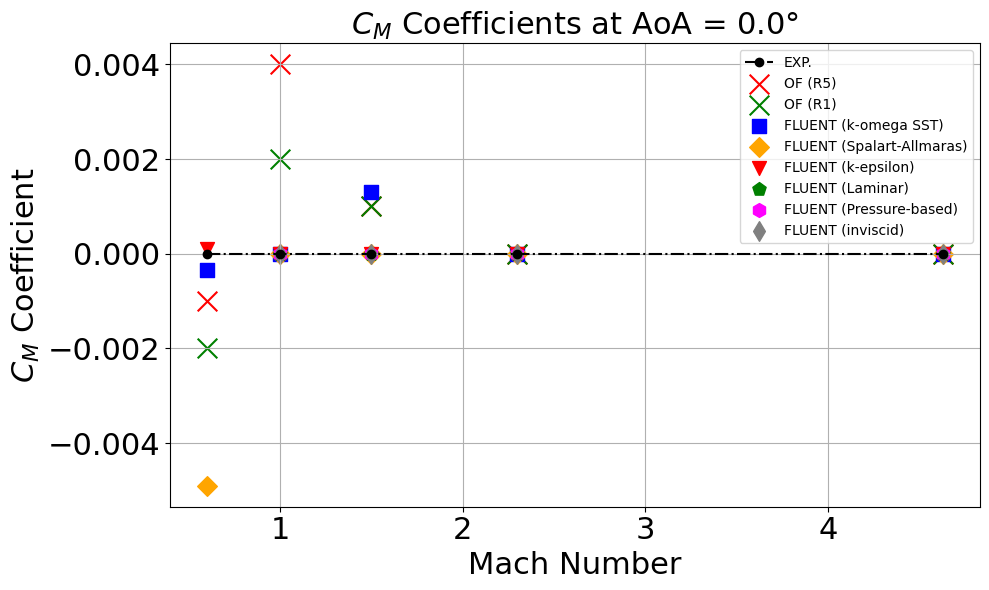

In [7]:
### OpenFOAM results ###
########################
# Data for Mach numbers and corresponding CM values for AoA = 0
OF_data = {
    0.6:  [-0.001, -0.002], # Corresponds to R5 and R1
    1.0:  [0.004, 0.002],   # Corresponds to R5 and R1
    1.5:  [0.001, 0.001],   # Corresponds to R5 and R1
    2.3:  [0.000, 0.000],   # Corresponds to R5 and R1
    4.63: [0.000, 0.000]    # Corresponds to R5 and R1
}

OF_mach_numbers = list(OF_data.keys())
CM_values_R5 = [values[0] for values in OF_data.values()]  
CM_values_R1 = [values[1] for values in OF_data.values()]  

# Fluent results for different turbulence models (example data)
FLUENT_data_models = {
    'k-omega SST': {
        0.6:  [-0.00034, -0.00034], # Corresponds to R5 and R1 (at the moment only R1 available)
        1.0:  [0.0,0.0],
        1.5:  [0.0013,0.0013],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'Spalart-Allmaras': {
        0.6:  [-0.0049, -0.0049],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'k-epsilon': {
        0.6:  [0.0001, 0.0001],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'Laminar': {
        #0.6:  [0.694, 0.694],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'Pressure-based': {
        #0.6:  [0.2138, 0.2138],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
 },
    'inviscid': {
        #0.6: [0.00238, 0.00238],
        1.0: [0.0,0.0],
        1.5: [0.0,0.0],
        2.3: [0.0,0.0],
        4.63: [0.0,0.0]
    }
}

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[80:81]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CM values for the specific AoA across all Mach numbers
    cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cm_values = cm_values.values
    
    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cm_values = cm_values[sorted_indices]
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(mach_numbers, cm_values, marker='o', linestyle='-.', color='k', label='EXP.')

    # Plotting OF results
    plt.scatter(OF_mach_numbers, CM_values_R5, marker='x', s=200, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CM_values_R1, marker='x', s=200, label='OF (R1)', color='green')
    
    # Plotting FLUENT results for each turbulence model
    markers = ['s', 'D', 'v', 'p', 'h', "d"]  # Different markers for each model
    colors = ['blue', 'orange', 'red', 'green', 'magenta', 'grey']  # Different colors for each model
    for (model_name, model_data), marker, color in zip(FLUENT_data_models.items(), markers, colors):
        mach_numbers_model = list(model_data.keys())
        cm_values_R1_model = [values[1] for values in model_data.values()]
        
        # Plotting the R1 values for simplicity (adjust as needed)
        plt.scatter(mach_numbers_model, cm_values_R1_model, marker=marker, s=100, label=f'FLUENT ({model_name})', color=color)
        
        # Calculate the error with respect to experimental values
        error_band = [abs(cm_values[np.argwhere(mach_numbers == mach)[0][0]] - model_value)
                      for mach, model_value in zip(mach_numbers_model, cm_values_R1_model)]
        
        # Adding error bands
        #plt.errorbar(mach_numbers_model, CM_values_R1_model, yerr=error_band, fmt='none', ecolor=color, elinewidth=1.5, capsize=3)
    
    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.tick_params(axis='both', which='minor', labelsize=22)
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel('$C_M$ Coefficient', fontsize=22)
    plt.title(f'$C_M$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"CM_alpha_{aoa_value}.png")
    plt.savefig(f"CM_alpha_{aoa_value}.eps")
    plt.savefig(f"CM_alpha_{aoa_value}.pdf")    
    plt.show()

### $C_M$ coefficient for $\alpha$ = 8$^\circ$ as function of Mach number.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


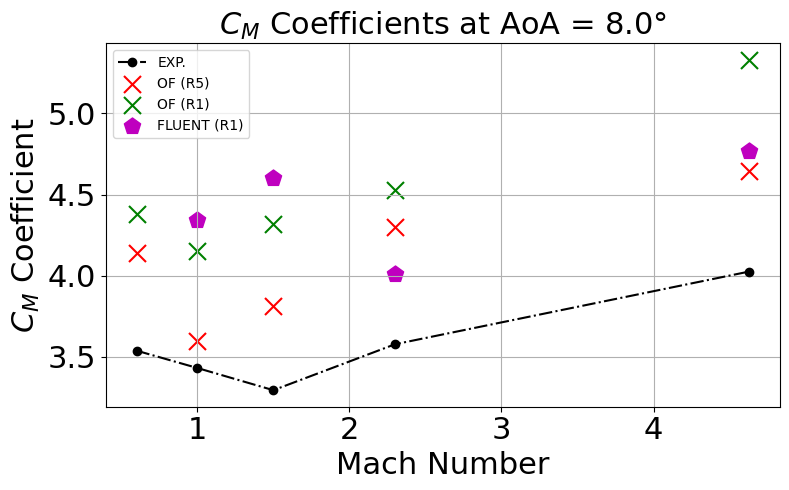

In [8]:
### OpenFOAM results ###
########################
# Data for Mach numbers and corresponding CM values for AoA = 8
OF_data = {
    0.6:  [4.138, 4.381], # Corresponds to R5 and R1
    1.0:  [3.599, 4.153], # Corresponds to R5 and R1
    1.5:  [3.812, 4.319], # Corresponds to R5 and R1
    2.3:  [4.301, 4.530], # Corresponds to R5 and R1
    4.63: [4.644, 5.330]  # Corresponds to R5 and R1
}

# Extracting Mach numbers and corresponding CM values
OF_mach_numbers = list(OF_data.keys())
CM_values_R5 = [values[0] for values in OF_data.values()]  # Select R5 values
CM_values_R1 = [values[1] for values in OF_data.values()]  # Select R1 values

### Fluent results ###
######################
# Data for Mach numbers and corresponding CM values for AoA = 8
FLUENT_data = {
    #0.6: [0.272,  0.373],  # Corresponds to R5 and R1
    1.0:  [4.3412, 4.3412], # Corresponds to R5 and R1
    1.5:  [4.600,  4.600],  # Corresponds to R5 and R1
    2.3:  [4.0081, 4.0081], # Corresponds to R5 and R1
    4.63: [4.7685, 4.7685]  # Corresponds to R5 and R1
}

# Extracting Mach numbers and corresponding CM values
FLUENT_mach_numbers = list(FLUENT_data.keys())
CM_values_R5_FLUENT = [values[0] for values in FLUENT_data.values()]  # Select R5 values
CM_values_R1_FLUENT = [values[1] for values in FLUENT_data.values()]  # Select R1 values

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[160:161]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CM values for the specific AoA across all Mach numbers
    cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cm_values = cm_values.values
    
    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cm_values = cm_values[sorted_indices]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(mach_numbers, cm_values, marker='o', linestyle='-.', color='k', label='EXP.')

    # Plotting OF results
    #plt.plot(OF_mach_numbers, CM_values_R5, marker='o', label='OF (R5)', color='red')
    #plt.plot(OF_mach_numbers, CM_values_R1, marker='o', label='OF (R1)', color='green')
    plt.scatter(OF_mach_numbers, CM_values_R5, marker='x', s=150, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CM_values_R1, marker='x', s=150, label='OF (R1)', color='green')
    
    # Plotting FLUENT results
    #plt.plot(FLUENT_mach_numbers, CM_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='k')
    #plt.plot(FLUENT_mach_numbers, CM_values_R1_FLUENT, marker='X', label='FLUENT (R1)', color='m')
    #plt.scatter(FLUENT_mach_numbers, CM_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='b')
    plt.scatter(FLUENT_mach_numbers, CM_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='m')

    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel(r'$C_M$ Coefficient', fontsize=22)
    plt.title(f'$C_M$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig("CM_alpha8.png")
    plt.savefig("CM_alpha8.eps")
    plt.savefig("CM_alpha8.pdf")            
    plt.show()

### $C_M$ coefficient for $\alpha$ = 16$^\circ$ as function of Mach number.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


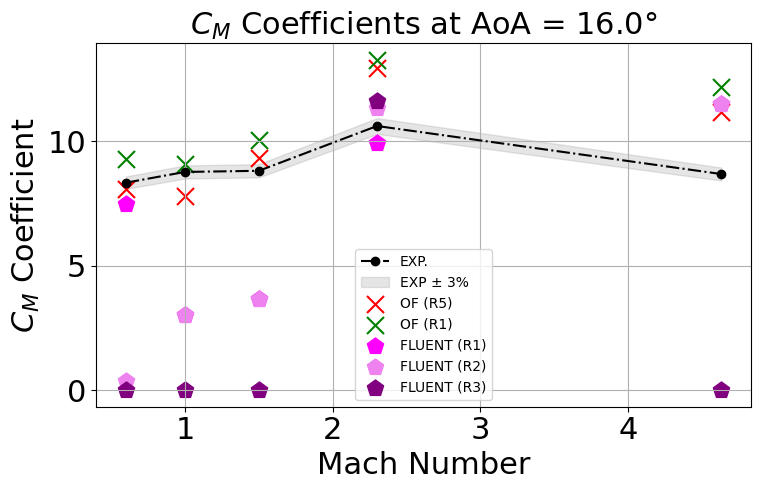

In [9]:
### OpenFOAM results ###
########################
# Data for Mach numbers and corresponding CM values for AoA = 16
OF_data = {
    0.6: [8.070, 9.275],  # Corresponds to R5 and R1
    1.0: [7.821, 9.073], 
    1.5: [9.337, 10.070],  
    2.3: [12.954, 13.270],  
    4.63: [11.157, 12.163] 
}

# Extracting Mach numbers and corresponding CM values
OF_mach_numbers = list(OF_data.keys())
CM_values_R5 = [values[0] for values in OF_data.values()]  # Select R5 values
CM_values_R1 = [values[1] for values in OF_data.values()]  # Select R1 values

### Fluent results ###
######################
# Data for Mach numbers and corresponding CM values for AoA = 16
FLUENT_data = {
    0.6:  [7.4704,  0.373,  0.000], # Corresponds to R1, R2, R3, R4, R5
    1.0:  [3.0295,  3.0295, 0.000],
    1.5:  [3.6761,  3.6761, 0.000], 
    2.3:  [9.9133,  11.350, 11.63], 
    4.63: [11.4942, 11.4942, 0.000] 
}

# Extracting Mach numbers and corresponding CM values
FLUENT_mach_numbers = list(FLUENT_data.keys())
CM_values_R1_FLUENT = [values[0] for values in FLUENT_data.values()]  # Select R1 values
CM_values_R2_FLUENT = [values[1] for values in FLUENT_data.values()]  # Select R2 values
CM_values_R3_FLUENT = [values[2] for values in FLUENT_data.values()]  # Select R3 values

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[240:241]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CM values for the specific AoA across all Mach numbers
    cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cm_values = cm_values.values
    
    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cm_values = cm_values[sorted_indices]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(mach_numbers, cm_values, marker='o', linestyle='-.', color='k', label='EXP.')

    # Calculating 3% error margins
    error_margin = cm_values * 0.03
    plt.fill_between(mach_numbers, cm_values - error_margin, cm_values + error_margin, color='gray', alpha=0.2, label="EXP ± 3%")

    # Plotting OF results
    plt.scatter(OF_mach_numbers, CM_values_R5, marker='x', s=150, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CM_values_R1, marker='x', s=150, label='OF (R1)', color='green')
    
    # Plotting FLUENT results
    plt.scatter(FLUENT_mach_numbers, CM_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='magenta')
    plt.scatter(FLUENT_mach_numbers, CM_values_R2_FLUENT, marker='p', s=150, label='FLUENT (R2)', color='violet')
    plt.scatter(FLUENT_mach_numbers, CM_values_R3_FLUENT, marker='p', s=150, label='FLUENT (R3)', color='purple')
    
    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel(r'$C_M$ Coefficient', fontsize=22)
    plt.title(f'$C_M$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig("CM_alpha16.png")
    plt.savefig("CM_alpha16.eps")
    plt.savefig("CM_alpha16.pdf")            
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


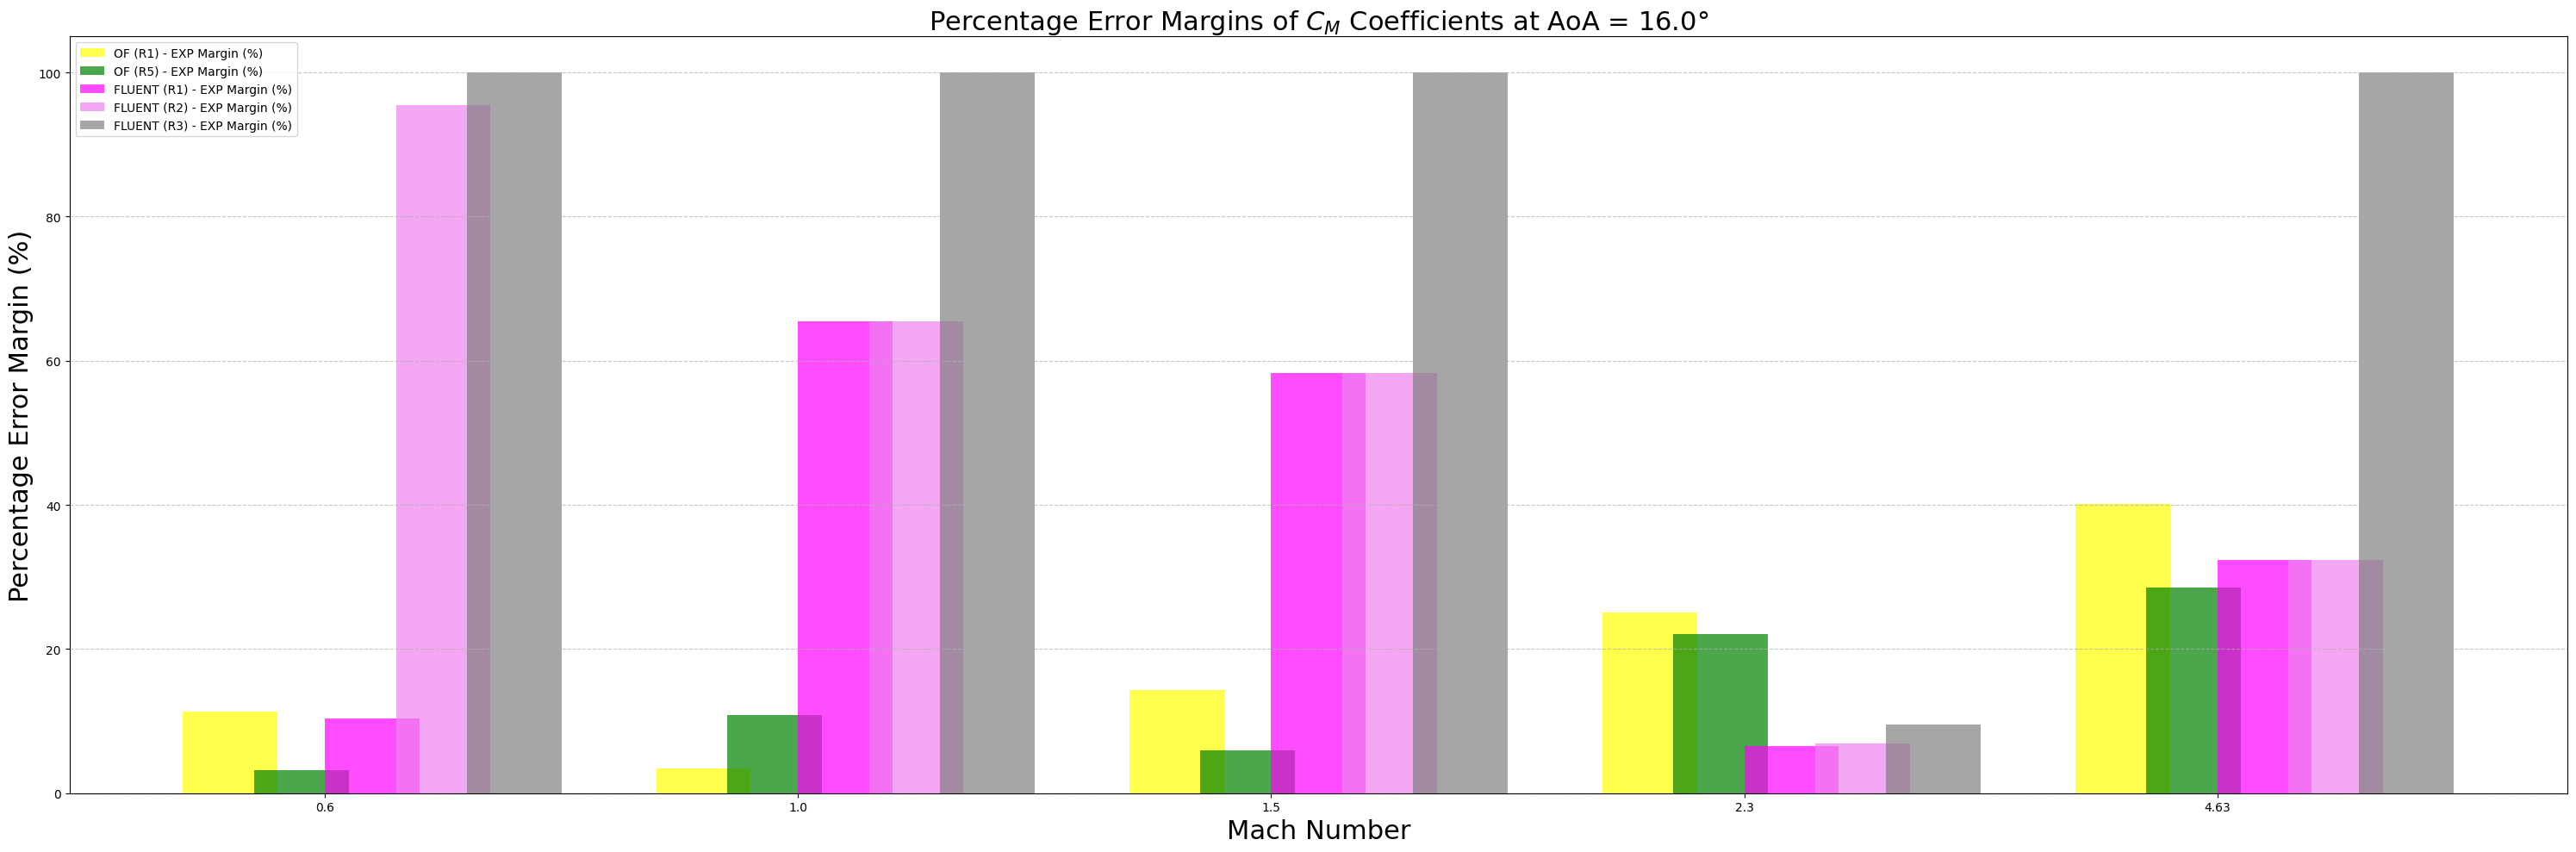

In [48]:
# OpenFOAM results
OF_data = {
    0.6:  [8.070, 9.275],  # Corresponds to R5 and R1
    1.0:  [7.821, 9.073],
    1.5:  [9.337, 10.070],
    2.3:  [12.954, 13.270],
    4.63: [11.157, 12.163]
}

# Extracting Mach numbers and corresponding CM values
OF_mach_numbers = list(OF_data.keys())
CM_values_R5 = np.array([values[0] for values in OF_data.values()])  # Select R5 values
CM_values_R1 = np.array([values[1] for values in OF_data.values()])  # Select R1 values

# Fluent results
FLUENT_data = {
    0.6:  [7.4704,  0.373,  0.000],  # Corresponds to R1, R2, R3, R4, R5
    1.0:  [3.0295,  3.0295, 0.000],
    1.5:  [3.6761,  3.6761, 0.000],
    2.3:  [9.9133,  11.350, 11.63],
    4.63: [11.4942, 11.4942, 0.000]
}

# Extracting Mach numbers and corresponding CM values
FLUENT_mach_numbers = list(FLUENT_data.keys())
CM_values_R1_FLUENT = np.array([values[0] for values in FLUENT_data.values()])  # Select R1 values
CM_values_R2_FLUENT = np.array([values[1] for values in FLUENT_data.values()])  # Select R2 values
CM_values_R3_FLUENT = np.array([values[2] for values in FLUENT_data.values()])  # Select R3 values

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()
selected_aoa_values = unique_aoa[240:241]  # Select a specific AoA value for demonstration

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CM values for the specific AoA across all Mach numbers
    cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cm_values = cm_values.values
    
    # Sort the Mach numbers and the corresponding CM values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cm_values = cm_values[sorted_indices]

    # Calculate percentage error margins
    OF_percentage_error_R5 = np.abs(cm_values - CM_values_R5) / np.abs(cm_values) * 100
    OF_percentage_error_R1 = np.abs(cm_values - CM_values_R1) / np.abs(cm_values) * 100
    
    FLUENT_percentage_error_R1 = np.abs(cm_values - CM_values_R1_FLUENT) / np.abs(cm_values) * 100
    FLUENT_percentage_error_R2 = np.abs(cm_values - CM_values_R2_FLUENT) / np.abs(cm_values) * 100
    FLUENT_percentage_error_R3 = np.abs(cm_values - CM_values_R3_FLUENT) / np.abs(cm_values) * 100
    
    # Plotting setup for percentage error margins
    plt.figure(figsize=(30, 10))
    width = 0.2 # Width of the bars
    x = np.arange(len(mach_numbers))  # Label locations

    # Create bar plots for percentage error margins
    barsR1OF = plt.bar(x - 4*width/4, OF_percentage_error_R1, width, label='OF (R1) - EXP Margin (%)', color='yellow', alpha=0.7)
    barsR5OF = plt.bar(x - width/4, OF_percentage_error_R5, width, label='OF (R5) - EXP Margin (%)', color='green', alpha=0.7)
    
    barsR1F  = plt.bar(x + 2*width/4, FLUENT_percentage_error_R1, width, label='FLUENT (R1) - EXP Margin (%)', color='magenta', alpha=0.7)
    barsR2F  = plt.bar(x + 5*width/4, FLUENT_percentage_error_R2, width, label='FLUENT (R2) - EXP Margin (%)', color='violet', alpha=0.7)
    barsR3F  = plt.bar(x + 8*width/4, FLUENT_percentage_error_R3, width, label='FLUENT (R3) - EXP Margin (%)', color='gray', alpha=0.7)

    # Axes labels, title, and ticks
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel('Percentage Error Margin (%)', fontsize=22)
    plt.title(f'Percentage Error Margins of $C_M$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.xticks(x, mach_numbers)  # Set the x-ticks to the Mach numbers
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()

    # Save and show the plot
    plt.tight_layout()
    plt.savefig("CM_PercentageErrorMargins_alpha16.png")
    plt.savefig("CM_PercentageErrorMargins_alpha16.eps")
    plt.savefig("CM_PercentageErrorMargins_alpha16.pdf")
    plt.show()

In [11]:
# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select AoA values starting from the first one and then every 10th value
selected_aoa_values = unique_aoa[::10]  # Slices every 10th element from the array

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CM values for the specific AoA across all Mach numbers
    cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Check if there are any valid CA values (not all NaN)
    if cm_values.notna().any():
        # Extract only the numeric part of the Mach number from column names using regex
        mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
        cm_values = cm_values.values
        
        # Sort the Mach numbers and C_N values together
        sorted_indices = np.argsort(mach_numbers)
        mach_numbers = np.array(mach_numbers)[sorted_indices]
        cm_values = cm_values[sorted_indices]
        
        # Plot
        # plt.figure(figsize=(8, 5))
        # plt.plot(mach_numbers, cm_values, marker='o', linestyle='-', color='b')
        # plt.xlabel('Mach Number')
        # plt.ylabel(r'$C_M$ Coefficient')  # Using LaTeX for C_N
        # plt.title(r'$C_M$ Coefficients at AoA = ' + f'{aoa_value}°')
        # plt.grid(True)
        # plt.tight_layout()
        # plt.show()
    else:
        print(f"No valid C_M values for AoA = {aoa_value}°; skipping this plot.")

No valid C_M values for AoA = -8.0°; skipping this plot.
No valid C_M values for AoA = -7.0°; skipping this plot.
No valid C_M values for AoA = -6.0°; skipping this plot.
No valid C_M values for AoA = -5.0°; skipping this plot.
No valid C_M values for AoA = 22.0°; skipping this plot.
No valid C_M values for AoA = 23.0°; skipping this plot.
No valid C_M values for AoA = 24.0°; skipping this plot.


In [12]:
# # Extract the unique AoA values, skipping NaNs
# unique_aoa = data['AoA'].dropna().unique()

# # Select AoA values starting from the first one and then every 10th value
# selected_aoa_values = unique_aoa[::10]  # Slices every 10th element from the array

# # Iterate over the selected AoA values and plot for each
# for aoa_value in selected_aoa_values:
#     # Extract the CM values for the specific AoA across all Mach numbers
#     cm_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
#     # Check if there are any valid CA values (not all NaN)
#     if cm_values.notna().any():
#         # Get the Mach numbers from column names
#         mach_numbers = [col.split('_')[0] for col in data.columns[1:]]
        
#         # Plot
#         plt.figure(figsize=(8, 5))
#         plt.plot(mach_numbers, cm_values, marker='o', linestyle='-', color='b')
#         plt.xlabel('Mach Number')
#         plt.ylabel('C_M Coefficient')
#         plt.title(f'C_M Coefficients at AoA = {aoa_value}°')
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"No valid C_M values for AoA = {aoa_value}°; skipping this plot.")